---
Clustering and the K-means Algorithm: Irises
---



There are three species of iris in the given data set: versicolor, setosa, virginica. 

Using the K-means algorithm, we can classify the irises to their correct species based on their features. 

In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

iris_data = datasets.load_iris()

In [33]:
#This tells us the data categories, in this case, we have 4-vectors
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
# we can convert the data to a pandas dataframe. 
dfIris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

In [35]:
dfIris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
#This will show us the "target" groupings for the iris classification. 
# - setosa : 0
# - versicolor: 1
# - viriginica: 2
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

---
## Now we can implment the k-Means algorithm to cluster the 150 data points into k = 3 seperate groups
---

In [37]:
# Select 3 arbitrary group members

k = 3
N = len(dfIris)
rows = np.arange(0,N,1)
group_representatives = np.random.choice(rows, size=k)
list_of_group_reps = []

# This will give us the (x1,x2,x3,x4) coordinates for each representative
for rep_num in range(k): 
    x1 = dfIris.iloc[rep_num,0]
    x2 = dfIris.iloc[rep_num,1]
    x3 = dfIris.iloc[rep_num,2]
    x4 = dfIris.iloc[rep_num,3]
    
    rep = (x1, x2, x3, x4)
    list_of_group_reps.append(rep)
    

for iterr in range(100):
    distances = []
    history = []
    #Compute the distance from each group representative to a data point i 
    for i in range(N): 
        for j in range(k):
            dist = np.sqrt((dfIris.iloc[i,0] - list_of_group_reps[j][0])**2+(dfIris.iloc[i,1] 
                        -list_of_group_reps[j][1])**2 + (dfIris.iloc[i,2] 
                        - list_of_group_reps[j][2])**2 + (dfIris.iloc[i,3] 
                        - list_of_group_reps[j][3])**2)
            distances.append(dist)
        group_names = np.arange(0,k,1)
        x = zip(distances, group_names)
        
        # Now choose the minimum distance and pull out the group name based on the minimum distance
        best_group = min(x)
        best_group = best_group[1]
        # Keep track of each data point and which group it has been assigned to
        history.append(best_group)
        #Empty the distances list for the next data point
        distances = []
        
        
    # Now compute the centroid of each cluster and set group rep to this centroid
    
    group0 = []
    group1 = []
    group2 = []
    
    for i, item in enumerate(history): 
        if item == 0: 
            group0.append(i)
        elif item == 1: 
            group1.append(i)
        elif item == 2: 
            group2.append(i)
            
    groups_idx = [group0, group1, group2]
    new_list_of_group_reps = []
    
    for g in groups_idx: 
        x1_sum = 0
        x2_sum = 0
        x3_sum = 0
        x4_sum = 0
        
        for idx in g:
            x1_sum += dfIris.iloc[idx,0]
            x2_sum += dfIris.iloc[idx,1]
            x3_sum += dfIris.iloc[idx,2]
            x4_sum += dfIris.iloc[idx,3]
            
        centroid = (x1_sum/len(g),x2_sum/len(g),x3_sum/len(g),x4_sum/len(g))
        new_list_of_group_reps.append(centroid)
        
    list_of_group_reps = new_list_of_group_reps
        
    
    
            
    

The left plot shows clustering from the above algorithm and the right plot shows the actual species each data point belongs to

No handles with labels found to put in legend.


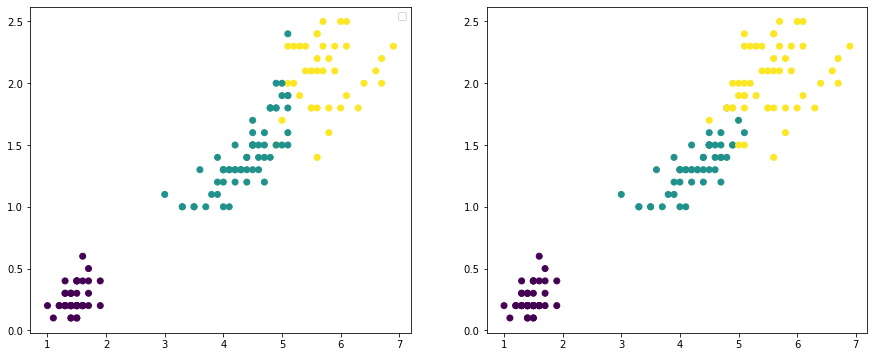

In [38]:
history = [abs(g-2) for g in history]

fig, ax = plt.subplots(nrows=1,ncols = 2,figsize = (15,6) )
ax[0].scatter(dfIris["petal length (cm)"], dfIris["petal width (cm)"], c=history)
ax[1].scatter(dfIris["petal length (cm)"], dfIris["petal width (cm)"], c=iris_data.target)

ax[0].legend()

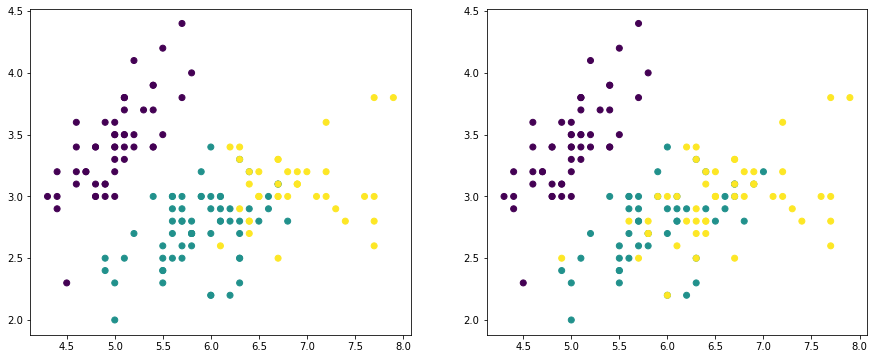

In [39]:
#Plot the petal length vs petal width using the clustering

fig, ax = plt.subplots(nrows=1,ncols = 2,figsize = (15,6) )

ax[0].scatter(dfIris["sepal length (cm)"], dfIris["sepal width (cm)"], c=group_history)
ax[1].scatter(dfIris["sepal length (cm)"], dfIris["sepal width (cm)"], c=iris_data.target)

---
## Percent Matched

Using the `history` list as well as the `iris.data.target` categorization, we can compute the percentage of data points that the k-means algorithm matched. 

In [40]:
difference = history - iris_data.target
match = difference == 0
match = np.sum(match)
percent_match = match / len(history)

In [41]:
print("This algorithm correctly matched {}% of the data points.".format(100*percent_match))

This algorithm correctly matched 88.66666666666667% of the data points.


We matched 88.67% of the data points!

---
## Now we can use the KMeans model to make a cluster model

In [42]:
from sklearn.cluster import KMeans

In [43]:
model = KMeans(n_clusters=3)

In [44]:
model.fit(dfIris)

KMeans(n_clusters=3)

In [45]:
groups = model.labels_
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [46]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

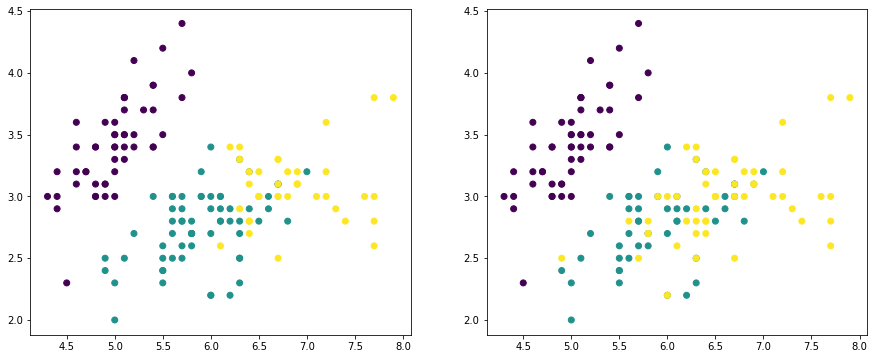

In [47]:
fig, ax = plt.subplots(nrows=1,ncols = 2,figsize = (15,6) )

ax[0].scatter(dfIris["sepal length (cm)"], dfIris["sepal width (cm)"], c=groups)
ax[1].scatter(dfIris["sepal length (cm)"], dfIris["sepal width (cm)"], c=iris_data.target)

---
## Percent Matched with KMeans Model

In [48]:
set_difference = groups - iris_data.target

num_match = set_difference == 0

num_match = np.sum(num_match)

percent_match = num_match/len(group_history)

print("This algorithm correctly matched {}% of the data points.".format(100*percent_match))

This algorithm correctly matched 89.33333333333333% of the data points.


Using the KMeans model, we matched 89.33% of the data points!